<!-- dom:TITLE: Data Analysis and Machine Learning: Day 3, Ridge and Lasso Regression and Resampling Methods -->
# Data Analysis and Machine Learning: Day 3, Ridge and Lasso Regression and Resampling Methods
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics and Center for Computing in Science Education, University of Oslo, Norway & Department of Physics and Astronomy and Facility for Rare Ion Beams and National Superconducting Cyclotron Laboratory, Michigan State University, USA -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Ion Beams and National Superconducting Cyclotron Laboratory, Michigan State University, USA

Date: **Jan 20, 2021**

Copyright 1999-2021, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license



## Plans for Day 3

* Statistics, probability theory and resampling methods

* Shrinkage methods: Ridge and Lasso Regression

## Why resampling methods

Before we proceed, we need to rethink what we have been doing. In our
eager to fit the data, we have omitted several important elements in
our regression analysis. In what follows we will
1. look at statistical properties, including a discussion of mean values, variance and the so-called bias-variance tradeoff

2. introduce resampling techniques like cross-validation, bootstrapping and jackknife and more

This will allow us to link the standard linear algebra methods we have discussed above to a statistical interpretation of the methods. 





## Resampling methods
Resampling methods are an indispensable tool in modern
statistics. They involve repeatedly drawing samples from a training
set and refitting a model of interest on each sample in order to
obtain additional information about the fitted model. For example, in
order to estimate the variability of a linear regression fit, we can
repeatedly draw different samples from the training data, fit a linear
regression to each new sample, and then examine the extent to which
the resulting fits differ. Such an approach may allow us to obtain
information that would not be available from fitting the model only
once using the original training sample.

Two resampling methods are often used in Machine Learning analyses,
1. The **bootstrap method**

2. and **Cross-Validation**

In addition there are several other methods such as the Jackknife and the Blocking methods. We will discuss in particular
cross-validation and the bootstrap method.




## Resampling approaches can be computationally expensive

Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using
different subsets of the training data. However, due to recent
advances in computing power, the computational requirements of
resampling methods generally are not prohibitive. In this chapter, we
discuss two of the most commonly used resampling methods,
cross-validation and the bootstrap. Both methods are important tools
in the practical application of many statistical learning
procedures. For example, cross-validation can be used to estimate the
test error associated with a given statistical learning method in
order to evaluate its performance, or to select the appropriate level
of flexibility. The process of evaluating a model’s performance is
known as model assessment, whereas the process of selecting the proper
level of flexibility for a model is known as model selection. The
bootstrap is widely used.



## Why resampling methods ?
**Statistical analysis.**


* Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods

* The results can be analysed with the same statistical tools as we would use analysing experimental data.

* As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

    

## Statistical analysis

* As in other experiments, many numerical  experiments have two classes of errors:

  * Statistical errors

  * Systematical errors


* Statistical errors can be estimated using standard tools from statistics

* Systematical errors are method specific and must be treated differently from case to case.

    




<!-- !split  -->
## Linking the regression analysis with a statistical interpretation


The
advantage of doing linear regression is that we actually end up with
analytical expressions for several statistical quantities.  
Standard least squares and Ridge regression  allow us to
derive quantities like the variance and other expectation values in a
rather straightforward way.


It is assumed that $\varepsilon_i
\sim \mathcal{N}(0, \sigma^2)$ and the $\varepsilon_{i}$ are
independent, i.e.:

$$
\begin{align*} 
\mbox{Cov}(\varepsilon_{i_1},
\varepsilon_{i_2}) & = \left\{ \begin{array}{lcc} \sigma^2 & \mbox{if}
& i_1 = i_2, \\ 0 & \mbox{if} & i_1 \not= i_2.  \end{array} \right.
\end{align*}
$$

The randomness of $\varepsilon_i$ implies that
$\mathbf{y}_i$ is also a random variable. In particular,
$\mathbf{y}_i$ is normally distributed, because $\varepsilon_i \sim
\mathcal{N}(0, \sigma^2)$ and $\mathbf{X}_{i,\ast} \, \boldsymbol{\beta}$ is a
non-random scalar. To specify the parameters of the distribution of
$\mathbf{y}_i$ we need to calculate its first two moments. 

Recall that $\boldsymbol{X}$ is a matrix of dimensionality $n\times p$. The
notation above $\mathbf{X}_{i,\ast}$ means that we are looking at the
row number $i$ and perform a sum over all values $p$.


## Assumptions made

The assumption we have made here can be summarized as (and this is going to be useful when we discuss the bias-variance trade off)
that there exists a function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim \mathcal{N}(0, \sigma^2)$
which describe our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We approximate this function with our model from the solution of the linear regression equations, that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we want to minimize $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, our MSE, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}.
$$

## Expectation value and variance

We can calculate the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\begin{align*} 
\mathbb{E}(y_i) & =
\mathbb{E}(\mathbf{X}_{i, \ast} \, \boldsymbol{\beta}) + \mathbb{E}(\varepsilon_i)
\, \, \, = \, \, \, \mathbf{X}_{i, \ast} \, \beta, 
\end{align*}
$$

while
its variance is

$$
\begin{align*} \mbox{Var}(y_i) & = \mathbb{E} \{ [y_i
- \mathbb{E}(y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( y_i^2 ) -
[\mathbb{E}(y_i)]^2  \\  & = \mathbb{E} [ ( \mathbf{X}_{i, \ast} \,
\beta + \varepsilon_i )^2] - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 \\ &
= \mathbb{E} [ ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2 \varepsilon_i
\mathbf{X}_{i, \ast} \, \boldsymbol{\beta} + \varepsilon_i^2 ] - ( \mathbf{X}_{i,
\ast} \, \beta)^2 \\  & = ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2
\mathbb{E}(\varepsilon_i) \mathbf{X}_{i, \ast} \, \boldsymbol{\beta} +
\mathbb{E}(\varepsilon_i^2 ) - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 
\\ & = \mathbb{E}(\varepsilon_i^2 ) \, \, \, = \, \, \,
\mbox{Var}(\varepsilon_i) \, \, \, = \, \, \, \sigma^2.  
\end{align*}
$$

Hence, $y_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$ (not be confused with the singular values of the SVD). 

## Expectation value and variance for $\boldsymbol{\beta}$

With the OLS expressions for the parameters $\boldsymbol{\beta}$ we can evaluate the expectation value

$$
\mathbb{E}(\boldsymbol{\beta}) = \mathbb{E}[ (\mathbf{X}^{\top} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbb{E}[ \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{X}\boldsymbol{\beta}=\boldsymbol{\beta}.
$$

This means that the estimator of the regression parameters is unbiased.

We can also calculate the variance

The variance of $\boldsymbol{\beta}$ is

$$
\begin{eqnarray*}
\mbox{Var}(\boldsymbol{\beta}) & = & \mathbb{E} \{ [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})] [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})]^{T} \}
\\
& = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}]^{T} \}
\\
% & = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}]^{T} \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & \mathbb{E} \{ (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} \, \mathbf{Y}^{T} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1}  \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \mathbb{E} \{ \mathbf{Y} \, \mathbf{Y}^{T} \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \{ \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \,  \mathbf{X}^{T} + \sigma^2 \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T \, \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^T \,  \mathbf{X}^T \, \mathbf{X} \, (\mathbf{X}^T % \mathbf{X})^{-1}
% \\
% & & + \, \, \sigma^2 \, (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T  \, \mathbf{X} \, (\mathbf{X}^T \mathbf{X})^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^T
\\
& = & \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}  + \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\, \, \, = \, \, \, \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1},
\end{eqnarray*}
$$

where we have used  that $\mathbb{E} (\mathbf{Y} \mathbf{Y}^{T}) =
\mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \, \mathbf{X}^{T} +
\sigma^2 \, \mathbf{I}_{nn}$. From $\mbox{Var}(\boldsymbol{\beta}) = \sigma^2
\, (\mathbf{X}^{T} \mathbf{X})^{-1}$, one obtains an estimate of the
variance of the estimate of the $j$-th regression coefficient:
$\boldsymbol{\sigma}^2 (\boldsymbol{\beta}_j ) = \boldsymbol{\sigma}^2 \sqrt{
[(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} }$. This may be used to
construct a confidence interval for the estimates.


In a similar way, we can obtain analytical expressions for say the
expectation values of the parameters $\boldsymbol{\beta}$ and their variance
when we employ Ridge regression, allowing us again to define a confidence interval. 

It is rather straightforward to show that

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}^{\mathrm{OLS}}.
$$

We see clearly that 
$\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] \not= \boldsymbol{\beta}^{\mathrm{OLS}}$ for any $\lambda > 0$. We say then that the ridge estimator is biased.

We can also compute the variance as

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T} \mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T},
$$

and it is easy to see that if the parameter $\lambda$ goes to infinity then the variance of Ridge parameters $\boldsymbol{\beta}$ goes to zero. 

With this, we can compute the difference

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{OLS}}]-\mbox{Var}(\boldsymbol{\beta}^{\mathrm{Ridge}})=\sigma^2 [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}[ 2\lambda\mathbf{I} + \lambda^2 (\mathbf{X}^{T} \mathbf{X})^{-1} ] \{ [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}.
$$

The difference is non-negative definite since each component of the
matrix product is non-negative definite. 
This means the variance we obtain with the standard OLS will always for $\lambda > 0$ be larger than the variance of $\boldsymbol{\beta}$ obtained with the Ridge estimator. This has interesting consequences when we discuss the so-called bias-variance trade-off below. 


## Resampling methods

With all these analytical equations for both the OLS and Ridge
regression, we will now outline how to assess a given model. This will
lead us to a discussion of the so-called bias-variance tradeoff (see
below) and so-called resampling methods.

One of the quantities we have discussed as a way to measure errors is
the mean-squared error (MSE), mainly used for fitting of continuous
functions. Another choice is the absolute error.

In the discussions below we will focus on the MSE and in particular since we will split the data into test and training data,
we discuss the
1. prediction error or simply the **test error** $\mathrm{Err_{Test}}$, where we have a fixed training set and the test error is the MSE arising from the data reserved for testing. We discuss also the 

2. training error $\mathrm{Err_{Train}}$, which is the average loss over the training data.

As our model becomes more and more complex, more of the training data tends to  used. The training may thence adapt to more complicated structures in the data. This may lead to a decrease in the bias (see below for code example) and a slight increase of the variance for the test error.
For a certain level of complexity the test error will reach minimum, before starting to increase again. The
training error reaches a saturation.




## Resampling methods: Jackknife and Bootstrap

Two famous
resampling methods are the **independent bootstrap** and **the jackknife**. 

The jackknife is a special case of the independent bootstrap. Still, the jackknife was made
popular prior to the independent bootstrap. And as the popularity of
the independent bootstrap soared, new variants, such as **the dependent bootstrap**.

The Jackknife and independent bootstrap work for
independent, identically distributed random variables.
If these conditions are not
satisfied, the methods will fail.  Yet, it should be said that if the data are
independent, identically distributed, and we only want to estimate the
variance of $\overline{X}$ (which often is the case), then there is no
need for bootstrapping. 

## Resampling methods: Jackknife

The Jackknife works by making many replicas of the estimator $\widehat{\theta}$. 
The jackknife is a resampling method where we systematically leave out one observation from the vector of observed values $\boldsymbol{x} = (x_1,x_2,\cdots,X_n)$. 
Let $\boldsymbol{x}_i$ denote the vector

$$
\boldsymbol{x}_i = (x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_n),
$$

which equals the vector $\boldsymbol{x}$ with the exception that observation
number $i$ is left out. Using this notation, define
$\widehat{\theta}_i$ to be the estimator
$\widehat{\theta}$ computed using $\vec{X}_i$. 


## Jackknife code example

In [1]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

## Resampling methods: Bootstrap
Bootstrapping is a nonparametric approach to statistical inference
that substitutes computation for more traditional distributional
assumptions and asymptotic results. Bootstrapping offers a number of
advantages: 
1. The bootstrap is quite general, although there are some cases in which it fails.  

2. Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data are not well behaved or when the sample size is small.  

3. It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically. 

4. It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples).




## Resampling methods: Bootstrap background

Since $\widehat{\theta} = \widehat{\theta}(\boldsymbol{X})$ is a function of random variables,
$\widehat{\theta}$ itself must be a random variable. Thus it has
a pdf, call this function $p(\boldsymbol{t})$. The aim of the bootstrap is to
estimate $p(\boldsymbol{t})$ by the relative frequency of
$\widehat{\theta}$. You can think of this as using a histogram
in the place of $p(\boldsymbol{t})$. If the relative frequency closely
resembles $p(\vec{t})$, then using numerics, it is straight forward to
estimate all the interesting parameters of $p(\boldsymbol{t})$ using point
estimators.  


## Resampling methods: More Bootstrap background

In the case that $\widehat{\theta}$ has
more than one component, and the components are independent, we use the
same estimator on each component separately.  If the probability
density function of $X_i$, $p(x)$, had been known, then it would have
been straight forward to do this by: 
1. Drawing lots of numbers from $p(x)$, suppose we call one such set of numbers $(X_1^*, X_2^*, \cdots, X_n^*)$. 

2. Then using these numbers, we could compute a replica of $\widehat{\theta}$ called $\widehat{\theta}^*$. 

By repeated use of (1) and (2), many
estimates of $\widehat{\theta}$ could have been obtained. The
idea is to use the relative frequency of $\widehat{\theta}^*$
(think of a histogram) as an estimate of $p(\boldsymbol{t})$.

## Resampling methods: Bootstrap approach

But
unless there is enough information available about the process that
generated $X_1,X_2,\cdots,X_n$, $p(x)$ is in general
unknown. Therefore, [Efron in 1979](https://projecteuclid.org/euclid.aos/1176344552)  asked the
question: What if we replace $p(x)$ by the relative frequency
of the observation $X_i$; if we draw observations in accordance with
the relative frequency of the observations, will we obtain the same
result in some asymptotic sense? The answer is yes.


Instead of generating the histogram for the relative
frequency of the observation $X_i$, just draw the values
$(X_1^*,X_2^*,\cdots,X_n^*)$ with replacement from the vector
$\boldsymbol{X}$. 

## Resampling methods: Bootstrap steps

The independent bootstrap works like this: 

1. Draw with replacement $n$ numbers for the observed variables $\boldsymbol{x} = (x_1,x_2,\cdots,x_n)$. 

2. Define a vector $\boldsymbol{x}^*$ containing the values which were drawn from $\boldsymbol{x}$. 

3. Using the vector $\boldsymbol{x}^*$ compute $\widehat{\theta}^*$ by evaluating $\widehat \theta$ under the observations $\boldsymbol{x}^*$. 

4. Repeat this process $k$ times. 

When you are done, you can draw a histogram of the relative frequency
of $\widehat \theta^*$. This is your estimate of the probability
distribution $p(t)$. Using this probability distribution you can
estimate any statistics thereof. In principle you never draw the
histogram of the relative frequency of $\widehat{\theta}^*$. Instead
you use the estimators corresponding to the statistic of interest. For
example, if you are interested in estimating the variance of $\widehat
\theta$, apply the etsimator $\widehat \sigma^2$ to the values
$\widehat \theta ^*$.


## Code example for the Bootstrap method

The following code starts with a Gaussian distribution with mean value
$\mu =100$ and variance $\sigma=15$. We use this to generate the data
used in the bootstrap analysis. The bootstrap analysis returns a data
set after a given number of bootstrap operations (as many as we have
data points). This data set consists of estimated mean values for each
bootstrap operation. The histogram generated by the bootstrap method
shows that the distribution for these mean values is also a Gaussian,
centered around the mean value $\mu=100$ but with standard deviation
$\sigma/\sqrt{n}$, where $n$ is the number of bootstrap samples (in
this case the same as the number of original data points). The value
of the standard deviation is what we expect from the central limit
theorem.

In [2]:
%matplotlib inline

from numpy import *
from numpy.random import randint, randn
from time import time
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Returns mean of bootstrap samples                                                                                                                                                
def stat(data):
    return mean(data)

# Bootstrap algorithm
def bootstrap(data, statistic, R):
    t = zeros(R); n = len(data); inds = arange(n); t0 = time()
    # non-parametric bootstrap         
    for i in range(R):
        t[i] = statistic(data[randint(0,n,n)])

    # analysis    
    print("Runtime: %g sec" % (time()-t0)); print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (statistic(data), std(data),mean(t),std(t)))
    return t


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# bootstrap returns the data sample                                    
t = bootstrap(x, stat, datapoints)
# the histogram of the bootstrapped  data                                                                                                    
n, binsboot, patches = plt.hist(t, 50, normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line  
y = mlab.normpdf( binsboot, mean(t), std(t))
lt = plt.plot(binsboot, y, 'r--', linewidth=1)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.axis([99.5, 100.6, 0, 3.0])
plt.grid(True)

plt.show()

<!-- !split  -->
## Various steps in cross-validation

When the repetitive splitting of the data set is done randomly,
samples may accidently end up in a fast majority of the splits in
either training or test set. Such samples may have an unbalanced
influence on either model building or prediction evaluation. To avoid
this $k$-fold cross-validation structures the data splitting. The
samples are divided into $k$ more or less equally sized exhaustive and
mutually exclusive subsets. In turn (at each split) one of these
subsets plays the role of the test set while the union of the
remaining subsets constitutes the training set. Such a splitting
warrants a balanced representation of each sample in both training and
test set over the splits. Still the division into the $k$ subsets
involves a degree of randomness. This may be fully excluded when
choosing $k=n$. This particular case is referred to as leave-one-out
cross-validation (LOOCV). 


## Cross-validation in brief

For the various values of $k$

1. shuffle the dataset randomly.

2. Split the dataset into $k$ groups.

3. For each unique group:

a. Decide which group to use as set for test data

b. Take the remaining groups as a training data set

c. Fit a model on the training set and evaluate it on the test set

d. Retain the evaluation score and discard the model


5. Summarize the model using the sample of model evaluation scores

## Code Example for Cross-validation and $k$-fold Cross-validation

The code here uses Ridge regression with cross-validation (CV)  resampling and $k$-fold CV in order to fit a specific polynomial.

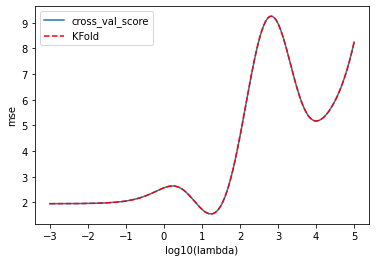

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

## The bias-variance tradeoff


We will discuss the bias-variance tradeoff in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks. Consider a dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$. 

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}
$$

where $\epsilon$ is normally distributed with mean zero and standard deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$. 

Thereafter we found the parameters $\boldsymbol{\beta}$ by optimizing the means squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

We can rewrite this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

The three terms represent the square of the bias of the learning
method, which can be thought of as the error caused by the simplifying
assumptions built into the method. The second term represents the
variance of the chosen model and finally the last terms is variance of
the error $\boldsymbol{\epsilon}$.

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$. The mean value of $\boldsymbol{\epsilon}$ is by definition equal to zero. Furthermore, the function $f$ is not a stochastics variable, idem for $\boldsymbol{\tilde{y}}$.
We use a more compact notation in terms of the expectation value

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

which, using the abovementioned expectation values can be rewritten as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]+\sigma^2,
$$

that is the rewriting in terms of the so-called bias, the variance of the model $\boldsymbol{\tilde{y}}$ and the variance of $\boldsymbol{\epsilon}$.





## Example code for Bias-Variance tradeoff

Error: 0.013121573975499602
Bias^2: 0.012073649439965807
Var: 0.0010479245355337968
0.013121573975499602 >= 0.012073649439965807 + 0.0010479245355337968 = 0.013121573975499604


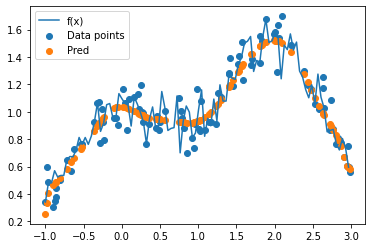

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()

## Understanding what happens

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726029
Var: 0.004579219539673836
0.08426840630693411 >= 0.07968918676726029 + 0.004579219539673836 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548984
Var: 0.003215318065760509
0.10398646080125035 >= 0.10077114273548984 + 0.003215318065760509 = 0.10398646080125035
Polynomial degree: 3
Error: 0.06547790180152357
Bias^2: 0.06208238634231953
Var: 0.0033955154592040944
0.06547790180152357 >= 0.06208238634231953 + 0.0033955154592040944 = 0.06547790180152363
Polynomial degree: 4
Error: 0.06844519414009438
Bias^2: 0.06453579006728315
Var: 0.003909404072811231
0.06844519414009438 >= 0.06453579006728315 + 0.003909404072811231 = 0.06844519414009438
Polynomial degree: 5
Error: 0.05227921801205692
Bias^

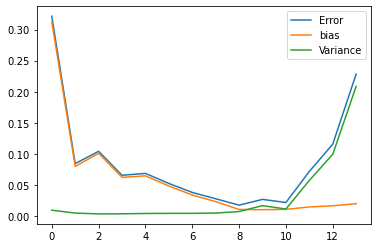

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

<!-- !split  -->
## Summing up




The bias-variance tradeoff summarizes the fundamental tension in
machine learning, particularly supervised learning, between the
complexity of a model and the amount of training data needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias, that is  a model whose asymptotic
performance is worse than another model because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 



The above equations tell us that in
order to minimize the expected test error, we need to select a
statistical learning method that simultaneously achieves low variance
and low bias. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.


What do we mean by the variance and bias of a statistical learning
method? The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large changes in the model. In general, more
flexible statistical methods have higher variance.


You may also find this recent [article](https://www.pnas.org/content/116/32/15849) of interest.

## Another Example from Scikit-Learn's Repository


Underfitting vs. Overfitting

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes

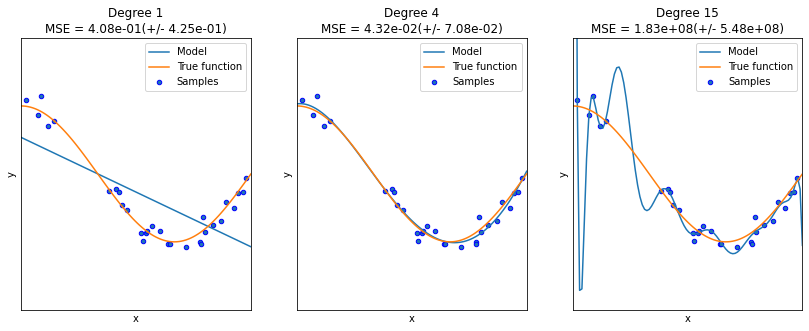

In [4]:
"""
============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## More examples on bootstrap and cross-validation and errors

In [5]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)

trials = 100
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)

# loop over trials in order to estimate the expectation value of the MSE
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        x_train, x_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
        model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred) 

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
    print("Degree of polynomial: %3d"% polynomial[polydegree])
    print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
    print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'DataFiles/EoS.csv'

<!-- !split  -->
## The same example but now with cross-validation

In [8]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
estimated_mse_sklearn = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
k =5
kfold = KFold(n_splits = k)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)
        OLS = LinearRegression()
# loop over trials in order to estimate the expectation value of the MSE
    estimated_mse_folds = cross_val_score(OLS, X, Energies, scoring='neg_mean_squared_error', cv=kfold)
#[:, np.newaxis]
    estimated_mse_sklearn[polydegree] = np.mean(-estimated_mse_folds)

plt.plot(polynomial, np.log10(estimated_mse_sklearn), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

## Cross-validation with Ridge

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
np.random.seed(3155)
# Generate the data.
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 10)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    estimated_mse_folds = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)
    i += 1
plt.figure()
plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## More on Ridge Regression

Using the matrix-vector expression for Ridge regression,

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

by taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 



<!-- !split  -->
## A better understanding of regularization

The parameter $\lambda$ that we have introduced in the Ridge (and
Lasso as well) regression is often called a regularization parameter
or shrinkage parameter. It is common to call it a hyperparameter. What does it mean mathemtically?

Here we will first look at how to analyze the difference between the
standard OLS equations and the Ridge expressions in terms of a linear
algebra analysis using the SVD algorithm. Thereafter, we will link
(see the material on the bias-variance tradeoff below) these
observation to the statisical analysis of the results. In particular
we consider how the variance of the parameters $\boldsymbol{\beta}$ is
affected by changing the parameter $\lambda$.

## Decomposing the OLS and Ridge expressions

We have our design matrix
 $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$. With the SVD we decompose it as

$$
\boldsymbol{X} = \boldsymbol{U\Sigma V^T},
$$

with $\boldsymbol{U}\in {\mathbb{R}}^{n\times n}$, $\boldsymbol{\Sigma}\in {\mathbb{R}}^{n\times p}$
and $\boldsymbol{V}\in {\mathbb{R}}^{p\times p}$.

The matrices $\boldsymbol{U}$ and $\boldsymbol{V}$ are unitary/orthonormal matrices, that is in case the matrices are real we have $\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ and $\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{V}\boldsymbol{V}^T=\boldsymbol{I}$.

Below we discuss some of the mathematics of the SVD decompostion.

## The singular value decomposition


The examples we have looked at so far are cases where we normally can
invert the matrix $\boldsymbol{X}^T\boldsymbol{X}$. Using a polynomial expansion as we
did both for the masses and the fitting of the equation of state,
leads to row vectors of the design matrix which are essentially
orthogonal due to the polynomial character of our model. Obtaining the inverse of the design matrix is then often done via a so-called LU, QR or Cholesky decomposition. 



This may
however not the be case in general and a standard matrix inversion
algorithm based on say LU, QR or Cholesky decomposition may lead to singularities. We will see examples of this below.

There is however a way to partially circumvent this problem and also gain some insights about the ordinary least squares approach, and later shrinkage methods like Ridge and Lasso regressions. 

This is given by the **Singular Value Decomposition** algorithm, perhaps
the most powerful linear algebra algorithm.  Let us look at a
different example where we may have problems with the standard matrix
inversion algorithm. Thereafter we dive into the math of the SVD.





## Linear Regression Problems

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We see this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ (the matrix we need to invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.


## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\beta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\beta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\beta_i$ cannot be estimated.

A cheap  *ad hoc* approach is  simply to add a small diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.  When we discuss **Ridge** regression this is actually what we end up evaluating. The parameter $\lambda$ is called a hyperparameter. More about this later. 



## Basic math of the SVD


From standard linear algebra we know that a square matrix $\boldsymbol{X}$ can be diagonalized if and only it is 
a so-called [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix), that is if $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$
we have $\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ or if $\boldsymbol{X}\in {\mathbb{C}}^{n\times n}$ we have $\boldsymbol{X}\boldsymbol{X}^{\dagger}=\boldsymbol{X}^{\dagger}\boldsymbol{X}$.
The matrix has then a set of eigenpairs

$$
(\lambda_1,\boldsymbol{u}_1),\dots, (\lambda_n,\boldsymbol{u}_n),
$$

and the eigenvalues are given by the diagonal matrix

$$
\boldsymbol{\Sigma}=\mathrm{Diag}(\lambda_1, \dots,\lambda_n).
$$

The matrix $\boldsymbol{X}$ can be written in terms of an orthogonal/unitary transformation $\boldsymbol{U}$

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ or $\boldsymbol{U}\boldsymbol{U}^{\dagger}=\boldsymbol{I}$.

Not all square matrices are diagonalizable. A matrix like the one discussed above

$$
\boldsymbol{X} = \begin{bmatrix} 
1&  -1 \\
1& -1\\
\end{bmatrix}
$$

is not diagonalizable, it is a so-called [defective matrix](https://en.wikipedia.org/wiki/Defective_matrix). It is easy to see that the condition
$\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ is not fulfilled. 


## The SVD, a Fantastic Algorithm


However, and this is the strength of the SVD algorithm, any general
matrix $\boldsymbol{X}$ can be decomposed in terms of a diagonal matrix and
two orthogonal/unitary matrices.  The [Singular Value Decompostion
(SVD) theorem](https://en.wikipedia.org/wiki/Singular_value_decomposition)
states that a general $m\times n$ matrix $\boldsymbol{X}$ can be written in
terms of a diagonal matrix $\boldsymbol{\Sigma}$ of dimensionality $m\times n$
and two orthognal matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has
dimensionality $m \times m$ and the last dimensionality $n\times n$.
We have then

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

As an example, the above defective matrix can be decomposed as

$$
\boldsymbol{X} = \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  1 \\ 1& -1\\ \end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 0\\ \end{bmatrix}    \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  -1 \\ 1& 1\\ \end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with eigenvalues $\sigma_1=2$ and $\sigma_2=0$. 
The SVD exits always! 

The SVD
decomposition (singular values) gives eigenvalues 
$\sigma_i\geq\sigma_{i+1}$ for all $i$ and for dimensions larger than $i=p$, the
eigenvalues (singular values) are zero.

In the general case, where our design matrix $\boldsymbol{X}$ has dimension
$n\times p$, the matrix is thus decomposed into an $n\times n$
orthogonal matrix $\boldsymbol{U}$, a $p\times p$ orthogonal matrix $\boldsymbol{V}$
and a diagonal matrix $\boldsymbol{\Sigma}$ with $r=\mathrm{min}(n,p)$
singular values $\sigma_i\geq 0$ on the main diagonal and zeros filling
the rest of the matrix.  There are at most $p$ singular values
assuming that $n > p$. In our regression examples for the nuclear
masses and the equation of state this is indeed the case, while for
the Ising model we have $p > n$. These are often cases that lead to
near singular or singular matrices.

The columns of $\boldsymbol{U}$ are called the left singular vectors while the columns of $\boldsymbol{V}$ are the right singular vectors.

## Economy-size SVD

If we assume that $n > p$, then our matrix $\boldsymbol{U}$ has dimension $n
\times n$. The last $n-p$ columns of $\boldsymbol{U}$ become however
irrelevant in our calculations since they are multiplied with the
zeros in $\boldsymbol{\Sigma}$.

The economy-size decomposition removes extra rows or columns of zeros
from the diagonal matrix of singular values, $\boldsymbol{\Sigma}$, along with the columns
in either $\boldsymbol{U}$ or $\boldsymbol{V}$ that multiply those zeros in the expression. 
Removing these zeros and columns can improve execution time
and reduce storage requirements without compromising the accuracy of
the decomposition.

If $n > p$, we keep only the first $p$ columns of $\boldsymbol{U}$ and $\boldsymbol{\Sigma}$ has dimension $p\times p$. 
If $p > n$, then only the first $n$ columns of $\boldsymbol{V}$ are computed and $\boldsymbol{\Sigma}$ has dimension $n\times n$.
The $n=p$ case is obvious, we retain the full SVD. 
In general the economy-size SVD leads to less FLOPS and still conserving the desired accuracy.

## Codes for the SVD

In [10]:
import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
#    print('test U')
#    print( (np.transpose(U) @ U - U @np.transpose(U)))
#    print('test VT')
#    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(s)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=s[i]
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))


X = np.array([ [1.0, -1.0, 2.0], [1.0, 0.0, 1.0], [1.0, 2.0, -1.0], [1.0, 1.0, 0.0] ])
print(X)
A = np.transpose(X) @ X
print(A)
# Brute force inversion of super-collinear matrix
#B = np.linalg.inv(A)
#print(B)
C = SVDinv(A)
print(C)

The matrix $\boldsymbol{X}$ has columns that are linearly dependent. The first
column is the row-wise sum of the other two columns. The rank of a
matrix (the column rank) is the dimension of space spanned by the
column vectors. The rank of the matrix is the number of linearly
independent columns, in this case just $2$. We see this from the
singular values when running the above code. Running the standard
inversion algorithm for matrix inversion with $\boldsymbol{X}^T\boldsymbol{X}$ results
in the program terminating due to a singular matrix.



## Mathematical Properties

There are several interesting mathematical properties which will be
relevant when we are going to discuss the differences between say
ordinary least squares (OLS) and **Ridge** regression.

We have from OLS that the parameters of the linear approximation are given by

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The matrix to invert can be rewritten in terms of our SVD decomposition as

$$
\boldsymbol{X}^T\boldsymbol{X} = \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Using the orthogonality properties of $\boldsymbol{U}$ we have

$$
\boldsymbol{X}^T\boldsymbol{X} = \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T =  \boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T,
$$

with $\boldsymbol{D}$ being a diagonal matrix with values along the diagonal given by the singular values squared. 

This means that

$$
(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{V} = \boldsymbol{V}\boldsymbol{D},
$$

that is the eigenvectors of $(\boldsymbol{X}^T\boldsymbol{X})$ are given by the columns of the right singular matrix of $\boldsymbol{X}$ and the eigenvalues are the squared singular values.  It is easy to show (show this) that

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U} = \boldsymbol{U}\boldsymbol{D},
$$

that is, the eigenvectors of $(\boldsymbol{X}\boldsymbol{X})^T$ are the columns of the left singular matrix and the eigenvalues are the same. 

Going back to our OLS equation we have

$$
\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

## OLS and Ridge in terms of an SVD Decomposition

We have then

$$
\tilde{y}^{OLS}={\bf X}\hat{\beta}^{OLS}=\sum_{j=1}^p {\bf u}_j{\bf u}_j^T{\bf y},
$$

for ordinary least squares (OLS) 
and for Ridge we have

$$
\tilde{y}^{Ridge}={\bf X}\hat{\beta}^{Ridge}=\sum_{j=1}^p {\bf u}_j\frac{\sigma_j^2}{\sigma_j^2+\lambda}{\bf u}_j^T{\bf y}.
$$

Note that the summation runs up tp $p$ only and not $n$.

Here we have that ${\bf X} = {\bf U}{\bf \Sigma}{\bf V}^T$, with $\Sigma$ being an $n\times p$ matrix and
${\bf V}$ being a $p\times p$ matrix. We also have assumed here that $ n > p$.


## Ridge and SVD
We see that Ridge regression is nothing but the standard
OLS with a modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The
consequences, in particular for our discussion of the bias-variance tradeoff 
are rather interesting.

Furthermore, if we use the result below in terms of the SVD decomposition, we have

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U} = \boldsymbol{U}\boldsymbol{D}.
$$

We can  analyse the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}
$$

For Ridge regression this becomes

$$
\boldsymbol{X}\boldsymbol{\beta}^{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$. 

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom.
Actually, calculating the variance of $\boldsymbol{X}\boldsymbol{v}_j$ shows that this quantity is equal to $\sigma_j^2/n$.
With a parameter $\lambda$ we can thus shrink the role of specific parameters.  


## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.